<a href="https://colab.research.google.com/github/kuroneko913/lab/blob/master/LifeGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LifeGame

In [0]:
import numpy as np
from more_itertools import windowed
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

誕生（＝白→黒になる）条件：白いマスの周囲に3つの黒いマスがあれば次の世代では黒いマスになる。
維持（＝黒→黒のまま）条件：黒いマスの周囲に2つか3つの黒いマスがあれば次の世代でも黒いマスになる。
上記以外の場合には，次の世代で白いマスになる。

In [0]:
# calc score
def calc(a):
  a[1,1] = 0
  return a.sum()

# 状態を変化させる
def change(a):
  x = a[1,1]
  score = calc(a)
  if (x==1):
    if(score==2 or score==3):
      a[1,1] = 1
    else:
      a[1,1] = 0
  if (x==0):
    if (score==3):
      a[1,1] = 1
    else:
      a[1,1] = 0
  return a

In [0]:
# matrix すべての状態を変化させる
def change_state(matrix_input):
  width = matrix_input.shape[0]+2
  matrix_pad = np.zeros(width**2).reshape(width,width)
  new_matrix = np.zeros(width**2).reshape(width,width)
  matrix_pad[1:width-1,1:width-1] =matrix_pad[1:width-1,1:width-1] + matrix_input
  for i in range(width-2):
    for j in range(width-2):
      mat = np.copy(matrix_pad[i:i+3,j:j+3])
      new_matrix[i+1,j+1] = change(mat)[1,1]
  return np.array(new_matrix[1:width-1,1:width-1])

# http://aidiary.hatenablog.com/entry/20120113/1326464820
def render(results, filename="ca.png"):
    """セルオートマトンを描画"""
    width = len(results[0])
    height = len(results)
    img = Image.new("RGB", (width, height), (255,255,255))
    draw = ImageDraw.Draw(img)
    for y in range(height):
        for x in range(width):
            if results[y][x] == 1:
                draw.point((x, y), (0, 0, 0))
    return img
  
def __updated_plot(i):
    return plt.imshow(mats[i])

In [0]:
mats = []
new_mat = np.random.choice([0.,1.],64).reshape(8,8)
im = render(new_mat)
mats.append(im)
for i in range(50):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

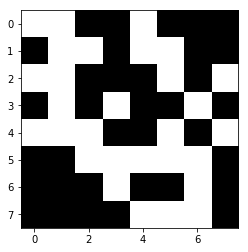

In [21]:
fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=500)
HTML(anim.to_html5_video())

信号点滅機

3つの場合

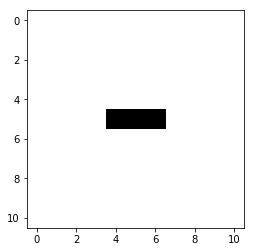

In [22]:
mats = []
new_mat = np.zeros(121).reshape(11,11)
new_mat[5,4:7] = 1
im = render(new_mat)
#plt.imshow(im)
mats.append(im)

for i in range(20):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=100)
HTML(anim.to_jshtml())

4つの場合

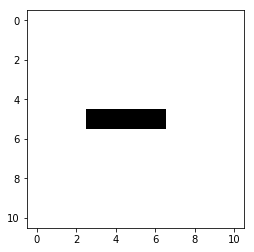

In [23]:
mats = []
new_mat = np.zeros(121).reshape(11,11)
new_mat[5,3:7] = 1
im = render(new_mat)
#plt.imshow(im)
mats.append(im)

for i in range(20):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=100)
HTML(anim.to_jshtml())

5つの場合

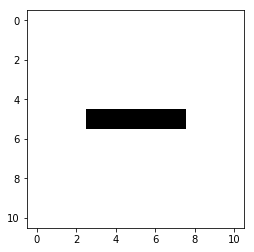

In [24]:
mats = []
new_mat = np.zeros(121).reshape(11,11)
new_mat[5,3:8] = 1
im = render(new_mat)
#plt.imshow(im)
mats.append(im)

for i in range(20):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=100)
HTML(anim.to_jshtml())

6つの場合

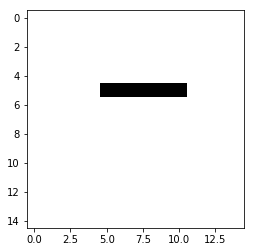

In [25]:
mats = []
new_mat = np.zeros(225).reshape(15,15)
new_mat[5,5:11] = 1
im = render(new_mat)
#plt.imshow(im)
mats.append(im)

for i in range(20):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=100)
HTML(anim.to_jshtml())

7つの場合

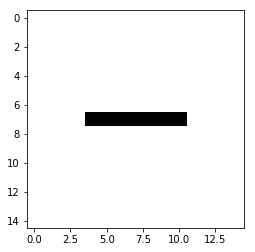

In [26]:
mats = []
new_mat = np.zeros(225).reshape(15,15)
new_mat[7,4:11] = 1
im = render(new_mat)
#plt.imshow(im)
mats.append(im)

for i in range(25):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=100)
HTML(anim.to_jshtml())

8つの場合

In [27]:
width = 25
mats = []
new_mat = np.zeros(width**2).reshape(width,width)
new_mat[7,8:16] = 1
im = render(new_mat)
#plt.imshow(im)
mats.append(im)

for i in range(100):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=100)
HTML(anim.to_jshtml())

9つの場合

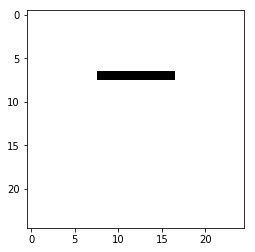

In [28]:
width = 25
mats = []
new_mat = np.zeros(width**2).reshape(width,width)
new_mat[7,8:17] = 1
im = render(new_mat)
#plt.imshow(im)
mats.append(im)

for i in range(100):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=100)
HTML(anim.to_jshtml())

10の場合

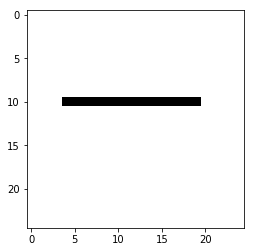

In [29]:
width = 25
mats = []
new_mat = np.zeros(width**2).reshape(width,width)
new_mat[10,4:20] = 1
im = render(new_mat)
#plt.imshow(im)
mats.append(im)

for i in range(100):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=100)
HTML(anim.to_jshtml())

無限に増殖するパターン

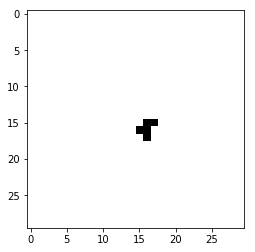

In [30]:
width = 30
mats = []
new_mat = np.zeros(width**2).reshape(width,width)
new_mat[15:18,15:18] = np.array([[0,1,1],[1,1,0],[0,1,0]])
im = render(new_mat)
#plt.imshow(im)
mats.append(im)

for i in range(200):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=100)
HTML(anim.to_jshtml())

glider

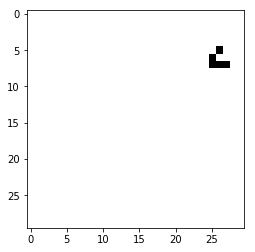

In [31]:
width = 30
mats = []
new_mat = np.zeros(width**2).reshape(width,width)
new_mat[5:8,25:28] = np.array([[0,1,0],[1,0,0],[1,1,1]])
im = render(new_mat)
#plt.imshow(im)
mats.append(im)

for i in range(100):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=100)
HTML(anim.to_jshtml())

In [32]:
width = 30
mats = []
new_mat = np.zeros(width**2).reshape(width,width)
new_mat[3:6,25:28] = np.array([[0,1,0],[1,0,0],[1,1,1]])
new_mat[7:10,22:25] = np.array([[0,1,0],[1,0,0],[1,1,1]])
new_mat[5:8,20:23] = np.array([[0,1,0],[1,0,0],[1,1,1]]).T
im = render(new_mat)
#plt.imshow(im)
mats.append(im)

for i in range(160):
  new_mat = change_state(new_mat)
  im = render(new_mat)
  mats.append(im)

fig = plt.figure()
anim = FuncAnimation(fig, __updated_plot, frames=len(mats), interval=100)
#HTML(anim.to_jshtml())
HTML(anim.to_html5_video())